In [23]:
import pandas as pd 
import nltk as nl
import numpy as np
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,KFold
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim.corpora import Dictionary
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score,silhouette_score,confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score,RocCurveDisplay,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
# import Web_Scraping
from warnings import filterwarnings
filterwarnings('ignore')


#Read the data (language detection)

In [24]:
df = pd.read_csv("lang.csv", index_col=0)
display(df)

,Text,Language
0,produced by hsin kuo 弁言 吾鄉先輩詩人徐菊潭有《豆棚吟》一冊，其所詠古...,Chinese
1,的又向家人父子重說一遍。有的道是說評話造出來的，未肯真信，也有信道古來有這 樣狠妒的婦人，也...,Chinese
2,卻說汪華未生時節，父親汪彥是個世代老實百姓，十五六歲跟了夥計學習江湖販賣生 意。徽州風俗，原...,Chinese
3,『陶淵明詩云：「種豆南山下，草盛豆苗希晨興理荒穢，帶月荷鋤歸。」不論甚麼豆 子，但要種他，須...,Chinese
4,，做來的事都在倫常圈子之外。倒是那不讀書的村鄙之夫，兩腳踏著實地，一心靠著 蒼天，不認得周公...,Chinese
...,...,...
36345,వృద్ద మిత్రుణ్ని చూశాక శాస్త్రి వెంటనే బయలుదేర...,Telugu
36346,అల్లాగనే చేసుకుంటుంది అయితే అంత మాత్రం చేత ఈ ల...,Telugu
36347,నిలబడుతున్నావో అది ఆమె తెచ్చుకున్న అవమానం ఆమె ...,Telugu
36348,రామకృష్ణ గ్రహించాడు ఫర్వాలేదులెండి మౌఢ్యం వెళ్...,Telugu


In [25]:
num_of_langs = len(df.Language.unique())
print(num_of_langs)
df.head()

28


,Text,Language
0,produced by hsin kuo 弁言 吾鄉先輩詩人徐菊潭有《豆棚吟》一冊，其所詠古...,Chinese
1,的又向家人父子重說一遍。有的道是說評話造出來的，未肯真信，也有信道古來有這 樣狠妒的婦人，也...,Chinese
2,卻說汪華未生時節，父親汪彥是個世代老實百姓，十五六歲跟了夥計學習江湖販賣生 意。徽州風俗，原...,Chinese
3,『陶淵明詩云：「種豆南山下，草盛豆苗希晨興理荒穢，帶月荷鋤歸。」不論甚麼豆 子，但要種他，須...,Chinese
4,，做來的事都在倫常圈子之外。倒是那不讀書的村鄙之夫，兩腳踏著實地，一心靠著 蒼天，不認得周公...,Chinese


<AxesSubplot:>

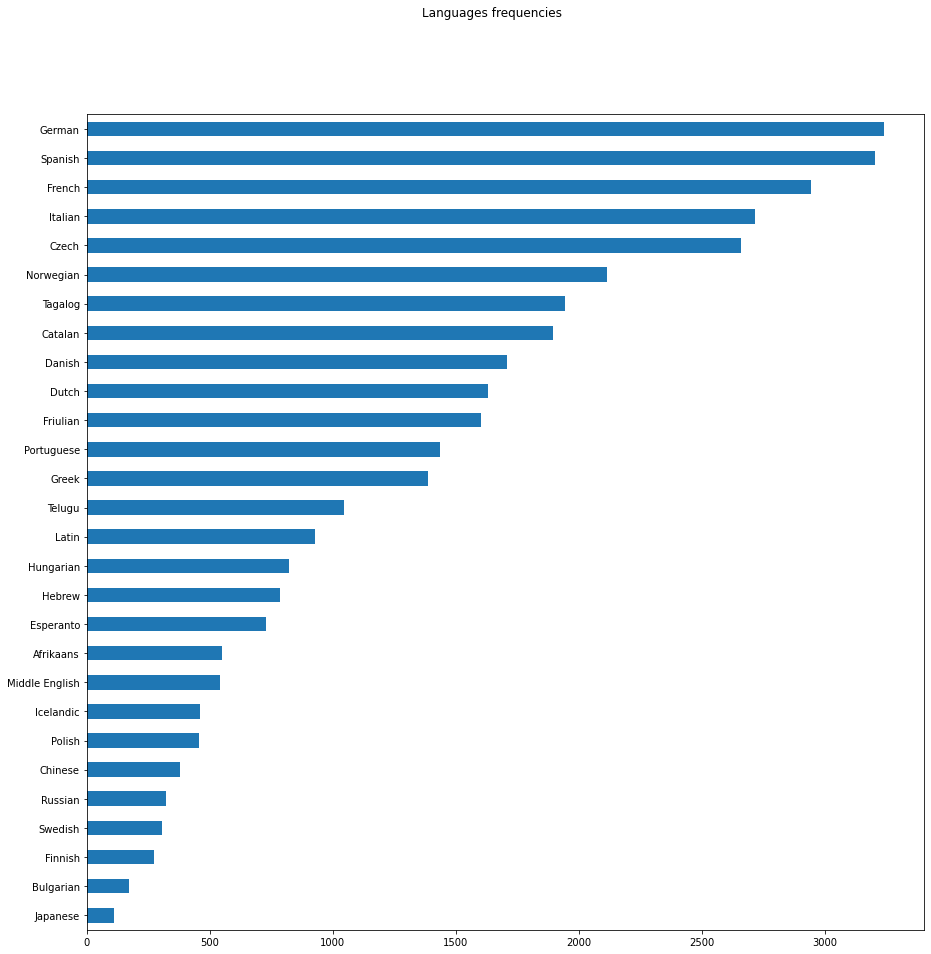

In [26]:
fig, axs = plt.subplots(1,figsize=(15,15))
fig.suptitle('Languages frequencies')  
df.Language.value_counts().sort_values().plot(kind = 'barh')

In [27]:
le = LabelEncoder()
df["Label"] = le.fit_transform(df.Language)

<AxesSubplot:>

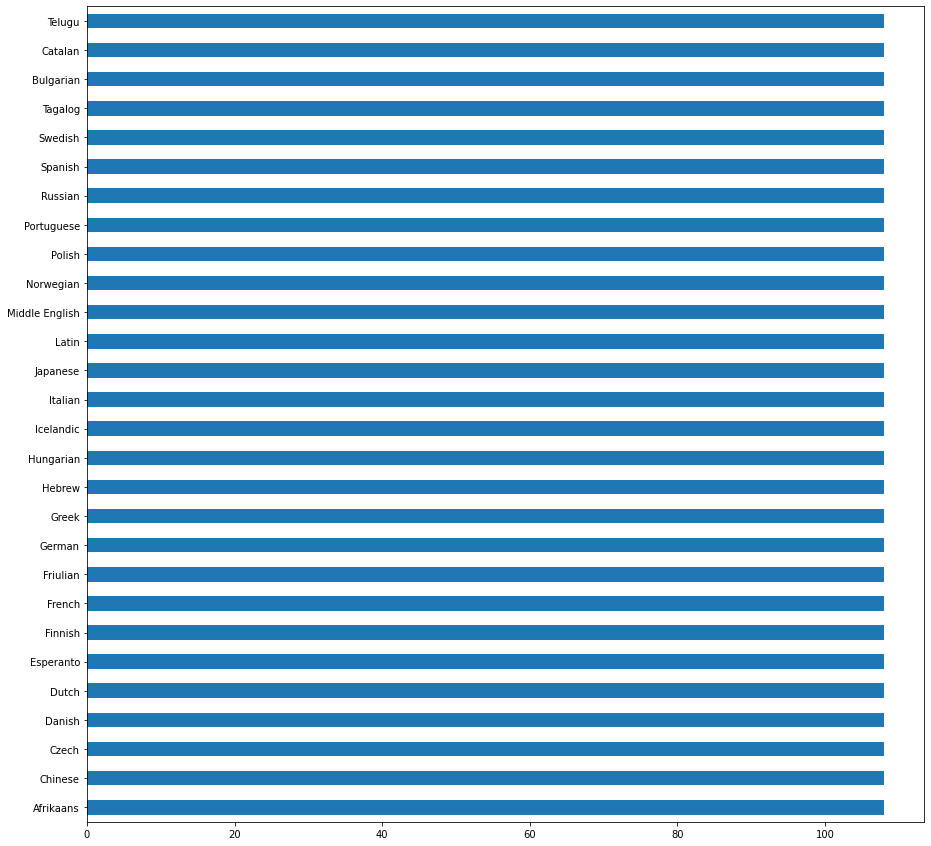

In [28]:
# We need some way under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X = df[['Text','Language']].to_numpy()
y = df.Label.to_numpy()
X_resampled, y_resampled = rus.fit_resample(X, y)
new_df = pd.DataFrame(X_resampled,columns=['Text','Language'])
new_df['Label'] = pd.Series(y_resampled)

fig, axs = plt.subplots(1,figsize=(15,15))
new_df.Language.value_counts().sort_values().plot(kind = 'barh')

##Feature Engineering

In [29]:
from sklearn.manifold import TSNE
def plot_tsne(reduced_X,labels):
    tsne_df = pd.DataFrame()
    tsne_df["y"] = labels
    colors = len(tsne_df["y"].unique())
    tsne_df["comp-1"] = reduced_X[:,0]
    tsne_df["comp-2"] = reduced_X[:,1]
    fig, ax = plt.subplots(1,figsize=(10,10))
    sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                    palette=sns.color_palette("hls", colors),
                data=tsne_df).set(title="T-SNE projection")

###**BOW**

In [30]:
def BOW(df):
    all_Partitions = list(df["Text"])
    
    vectorizer = CountVectorizer(analyzer = "word")
    bow_matrix = vectorizer.fit(all_Partitions)
    feature_names = vectorizer.vocabulary_
    
    bow_matrix = vectorizer.transform(all_Partitions)
    feature_array = bow_matrix.toarray()
    
    display(pd.DataFrame(feature_array, columns=feature_names))
    return feature_array

X_bag_of_words= BOW(new_df)


,toe,kom,die,boesmans,van,alle,kante,om,daardie,lekker,...,గదమ,రవమ,ఛన,షగ,పగలర,అరక,ఈద,ఊహలక,చలక,నవలస
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# use TSNE to speed up train
from sklearn.manifold import TSNE
tsne_BOW = TSNE(n_components=2)
tsne_X_bag_of_words = tsne_BOW.fit_transform(X_bag_of_words)

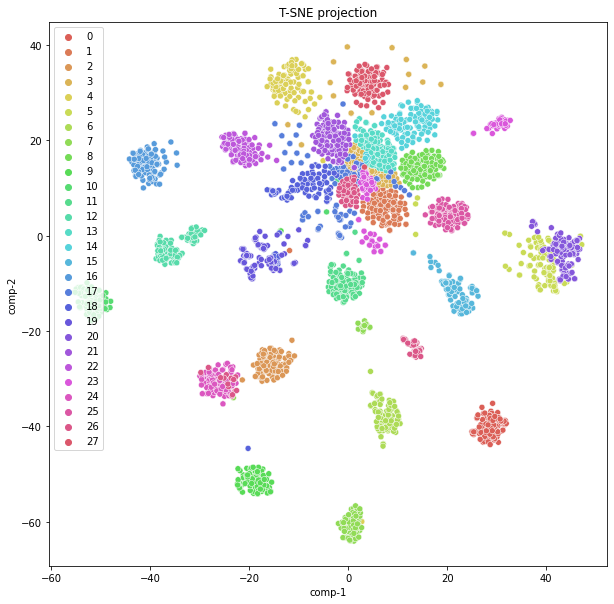

In [32]:
plot_tsne(tsne_X_bag_of_words,new_df.Label)

In [33]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow ,lang_train_bow, lang_test_bow= train_test_split(X_bag_of_words, new_df.Label, new_df.Language , test_size = 0.20, random_state=42)

In [34]:
########## use PCA to speed up train
from sklearn.decomposition import PCA
pca_BOW = PCA(n_components=500)
X_bag_of_words_pca = pca_BOW.fit_transform(X_bag_of_words)
X_train_bow_pca = pca_BOW.transform(X_train_bow)
X_test_bow_pca = pca_BOW.transform(X_test_bow)


###**Doc2Vec**

In [35]:
def get_Vector_from_Doc2Vec(corpus):
    tokenized_df =[]
    for paragraph in corpus:
        tokens = gensim.utils.simple_preprocess(paragraph)
        tokenized_df.append(tokens)
    documents = [gensim.models.doc2vec.TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_df)]
    doc2vec_model = gensim.models.doc2vec.Doc2Vec(documents,dm=1,vector_size=30, min_count=2, epochs=40, workers =5)
    corpus_vectors=[]
    for line in tokenized_df:
        inferred_vector = doc2vec_model.infer_vector(line)
        corpus_vectors.append(inferred_vector)
    return corpus_vectors

vec = get_Vector_from_Doc2Vec(new_df['Text'])
X_train_doc2vex, X_test_doc2vex, y_train_doc2vex, y_test_doc2vex = train_test_split(vec, new_df.Label , test_size = 0.20, random_state=42)

#### We will use TSNE with 2 components with doc2vec

In [36]:

tsne_VEC = TSNE(n_components=2)
tsne_X_vec = tsne_VEC.fit_transform(vec)


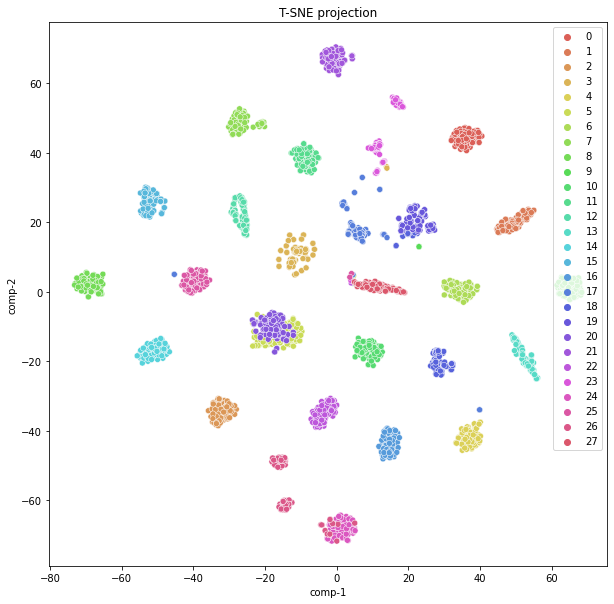

In [37]:
plot_tsne(tsne_X_vec,new_df.Label)

## **Classification** 

In [38]:
def ModelAssemesment(y_test, prediction):
    '''
        1- get accuracy of a classifier.
        2- plot confusion matrix.
        3- print classification report
    '''
    cm = confusion_matrix(y_test, prediction)
    cmDisp = ConfusionMatrixDisplay(cm) 
    fig, axs = plt.subplots(1,figsize=(10,10))
    cmDisp.plot(ax=axs)
    plt.show()
    print(classification_report(y_test, prediction))

In [39]:
def get_misclassified_languages(y_true,y_pred, title):
    print(f"Languages with the highest missclasfied number of labels using {title}")
    recall_scores= recall_score(y_true,y_pred,average=None)
    recall_score_df = pd.DataFrame({'Recall': recall_scores , 'Label' : [x for x in range(num_of_langs)]})
    recall_score_df['Lang'] = [le.inverse_transform([label])[0] for label in recall_score_df['Label']]
    recall_score_df = recall_score_df.sort_values(['Recall'], ascending=[True])
    recall_score_df = recall_score_df[recall_score_df['Recall'] < 1]
    return (recall_score_df)

In [40]:
def print_avg_bias_variance_loss(clf, X_train, y_train, X_test, y_test):
    loss, bias, var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test , loss='0-1_loss', num_rounds=200, random_seed=123)

    print('Average expected loss: %.3f' % loss)
    print('Avg Bias: %.3f' % bias)
    print('Avg Variance: %.3f' % var)

### **WITH BOW**

#### Apply SVC for BOW

In [41]:
SVC_clf = SVC()
SVC_clf.fit(X_train_bow_pca, y_train_bow)
y_pred_bow_SVC = SVC_clf.predict(X_test_bow_pca)

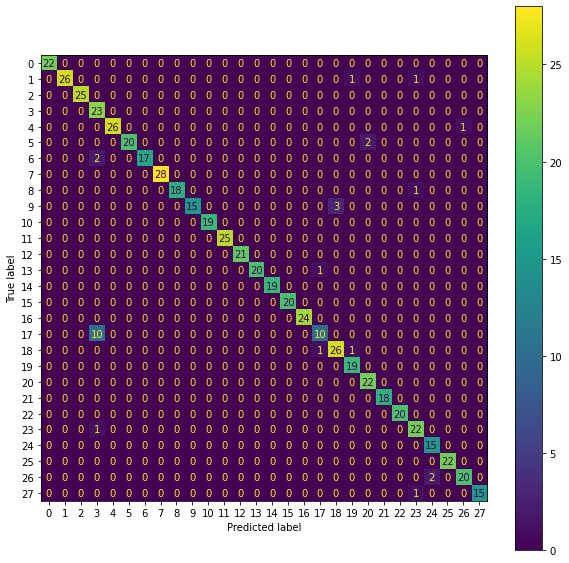

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        25
           3       0.64      1.00      0.78        23
           4       1.00      0.96      0.98        27
           5       1.00      0.91      0.95        22
           6       1.00      0.89      0.94        19
           7       1.00      1.00      1.00        28
           8       1.00      0.95      0.97        19
           9       1.00      0.83      0.91        18
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        21
          13       1.00      0.95      0.98        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       0.83    

In [42]:
ModelAssemesment(y_test_bow,y_pred_bow_SVC)

In [43]:
print_avg_bias_variance_loss(SVC_clf,X_train_bow_pca,y_train_bow.values,X_test_bow_pca,y_test_bow.values)

Average expected loss: 0.053
Avg Bias: 0.048
Avg Variance: 0.013


In [44]:
get_misclassified_languages(y_test_bow,y_pred_bow_SVC, "SVC with BOW")

Languages with the highest missclasfied number of labels using SVC with BOW


,Recall,Label,Lang
17,0.500000,17,Japanese
9,0.833333,9,French
6,0.894737,6,Dutch
26,0.909091,26,Tagalog
5,0.909091,5,Danish
1,0.928571,1,Bulgarian
18,0.928571,18,Latin
27,0.937500,27,Telugu
8,0.947368,8,Finnish
13,0.952381,13,Hebrew


#### Apply KNN for BOW

In [45]:
from sklearn.neighbors import KNeighborsClassifier
Knn_clf = KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train_bow_pca, y_train_bow)
y_pred_bow_Knn = Knn_clf.predict(X_test_bow_pca)

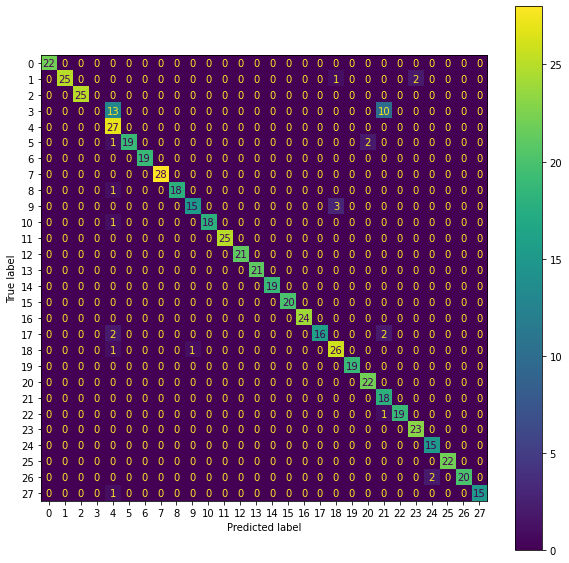

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.89      0.94        28
           2       1.00      1.00      1.00        25
           3       0.00      0.00      0.00        23
           4       0.57      1.00      0.73        27
           5       1.00      0.86      0.93        22
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        28
           8       1.00      0.95      0.97        19
           9       0.94      0.83      0.88        18
          10       1.00      0.95      0.97        19
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       1.00    

In [46]:
ModelAssemesment(y_test_bow,y_pred_bow_Knn)

In [47]:
print_avg_bias_variance_loss(Knn_clf,X_train_bow_pca,y_train_bow.values,X_test_bow_pca,y_test_bow.values)

Average expected loss: 0.088
Avg Bias: 0.074
Avg Variance: 0.065


In [48]:
get_misclassified_languages(y_test_bow,y_pred_bow_Knn, "KNN with BOW")

Languages with the highest missclasfied number of labels using KNN with BOW


,Recall,Label,Lang
3,0.000000,3,Chinese
17,0.800000,17,Japanese
9,0.833333,9,French
5,0.863636,5,Danish
1,0.892857,1,Bulgarian
26,0.909091,26,Tagalog
18,0.928571,18,Latin
27,0.937500,27,Telugu
10,0.947368,10,Friulian
8,0.947368,8,Finnish


In [49]:
def cross_validation(clf, num_of_KFold , X_train, y_train ):
    print("Accuracy using cross validation with 10-Fold")
    kf = KFold(n_splits=num_of_KFold,shuffle=True,random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=kf)
    i=0
    for score in scores:
        i+=1
        print(" Iteration: %r Accuracy: %0.2f "%((i),score))
    print("Total accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [50]:
cross_validation(Knn_clf, 10 , X_train_bow_pca, y_train_bow)

Accuracy using cross validation with 10-Fold
 Iteration: 1 Accuracy: 0.91 
 Iteration: 2 Accuracy: 0.92 
 Iteration: 3 Accuracy: 0.91 
 Iteration: 4 Accuracy: 0.92 
 Iteration: 5 Accuracy: 0.95 
 Iteration: 6 Accuracy: 0.92 
 Iteration: 7 Accuracy: 0.92 
 Iteration: 8 Accuracy: 0.93 
 Iteration: 9 Accuracy: 0.93 
 Iteration: 10 Accuracy: 0.95 
Total accuracy: 0.93 (+/- 0.03)


#### Apply LR for BOW

In [51]:
from sklearn.linear_model import LogisticRegressionCV
LR_clf = LogisticRegressionCV(cv=10, random_state=0)
# Train Decision Tree Classifer
LR_clf.fit(X_train_bow_pca, y_train_bow)
#Predict the response for test dataset
y_pred_bow_LR = LR_clf.predict(X_test_bow_pca)

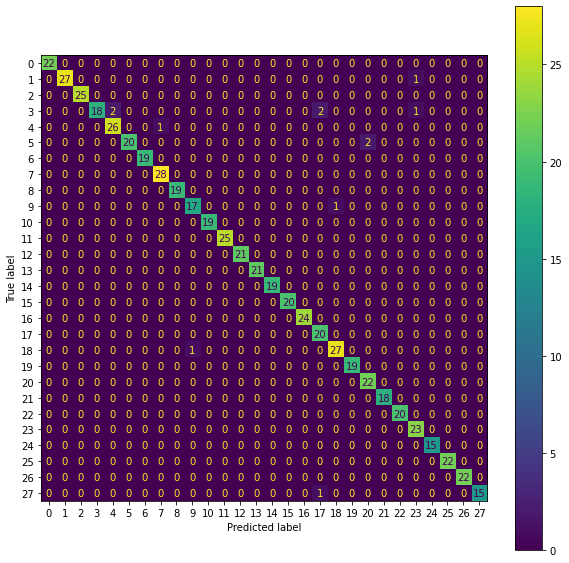

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        25
           3       1.00      0.78      0.88        23
           4       0.93      0.96      0.95        27
           5       1.00      0.91      0.95        22
           6       1.00      1.00      1.00        19
           7       0.97      1.00      0.98        28
           8       1.00      1.00      1.00        19
           9       0.94      0.94      0.94        18
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       0.87    

In [52]:
ModelAssemesment(y_test_bow,y_pred_bow_LR)

print_avg_bias_variance_loss(LR_clf,X_train_bow_pca,y_train_bow.values,X_test_bow_pca,y_test_bow.values)

In [53]:
get_misclassified_languages(y_test_bow,y_pred_bow_LR, "LR with BOW")

Languages with the highest missclasfied number of labels using LR with BOW


,Recall,Label,Lang
3,0.782609,3,Chinese
5,0.909091,5,Danish
27,0.937500,27,Telugu
9,0.944444,9,French
4,0.962963,4,Czech
1,0.964286,1,Bulgarian
18,0.964286,18,Latin


#### Apply RF for BOW

In [54]:

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_bow, y_train_bow)
y_pred_bow_RF = RF_clf.predict(X_test_bow)

In [55]:

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_bow_pca, y_train_bow)
y_pred_bow_RF = RF_clf.predict(X_test_bow_pca)

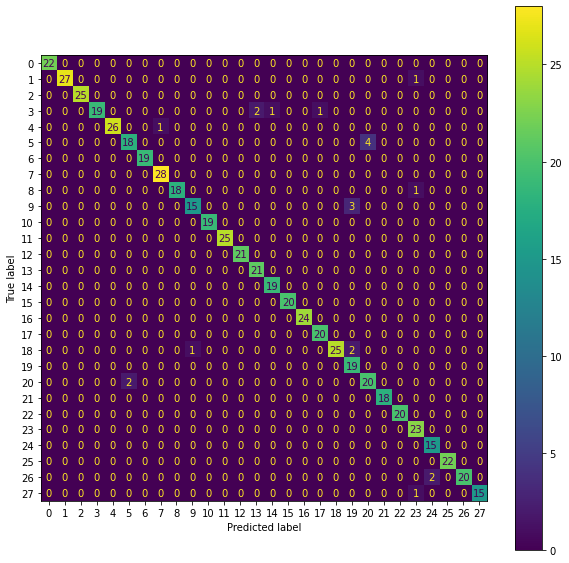

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        25
           3       1.00      0.83      0.90        23
           4       1.00      0.96      0.98        27
           5       0.90      0.82      0.86        22
           6       1.00      1.00      1.00        19
           7       0.97      1.00      0.98        28
           8       1.00      0.95      0.97        19
           9       0.94      0.83      0.88        18
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        21
          13       0.91      1.00      0.95        21
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       0.95    

In [56]:
ModelAssemesment(y_test_bow,y_pred_bow_RF)

In [57]:
print_avg_bias_variance_loss(RF_clf,X_train_bow_pca,y_train_bow.values,X_test_bow_pca,y_test_bow.values)

Average expected loss: 0.040
Avg Bias: 0.035
Avg Variance: 0.017


In [58]:
get_misclassified_languages(y_test_bow,y_pred_bow_RF, "RF with BOW")

Languages with the highest missclasfied number of labels using RF with BOW


,Recall,Label,Lang
5,0.818182,5,Danish
3,0.826087,3,Chinese
9,0.833333,9,French
18,0.892857,18,Latin
26,0.909091,26,Tagalog
20,0.909091,20,Norwegian
27,0.937500,27,Telugu
8,0.947368,8,Finnish
4,0.962963,4,Czech
1,0.964286,1,Bulgarian


### **WITH Doc2Vec**

#### Apply SVC for Doc2Vec

In [59]:
SVC_clf_d = SVC()
SVC_clf_d.fit(X_train_doc2vex, y_train_doc2vex)
y_pred_doc2vec_SVC = SVC_clf_d.predict(X_test_doc2vex)

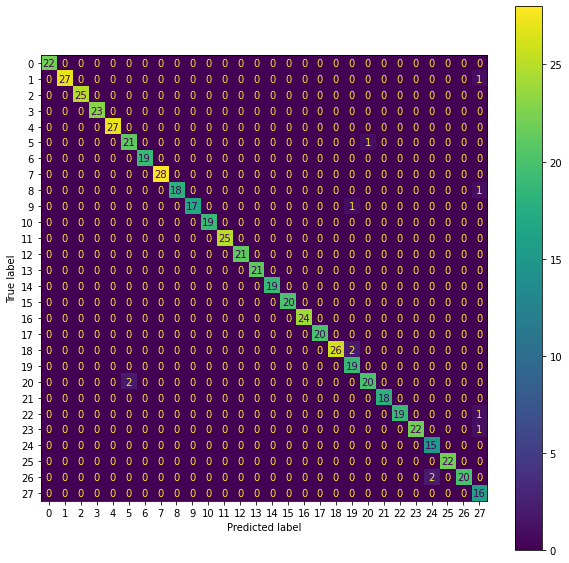

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        27
           5       0.91      0.95      0.93        22
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        28
           8       1.00      0.95      0.97        19
           9       1.00      0.94      0.97        18
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       1.00    

In [60]:
ModelAssemesment(y_test_doc2vex,y_pred_doc2vec_SVC)

In [64]:
print_avg_bias_variance_loss(SVC_clf_d,np.array(X_train_doc2vex),y_train_doc2vex.values,np.array(X_test_doc2vex),y_test_doc2vex.values)

Average expected loss: 0.023
Avg Bias: 0.018
Avg Variance: 0.010


In [65]:
get_misclassified_languages(y_test_doc2vex,y_pred_doc2vec_SVC, "SVC with Doc2Vec")

Languages with the highest missclasfied number of labels using SVC with Doc2Vec


,Recall,Label,Lang
20,0.909091,20,Norwegian
26,0.909091,26,Tagalog
18,0.928571,18,Latin
9,0.944444,9,French
8,0.947368,8,Finnish
22,0.950000,22,Portuguese
5,0.954545,5,Danish
23,0.956522,23,Russian
1,0.964286,1,Bulgarian


#### Apply KNN for Doc2Vec

In [66]:
from sklearn.neighbors import KNeighborsClassifier
Knn_clf_d = KNeighborsClassifier(n_neighbors=3)
Knn_clf_d.fit(X_train_doc2vex, y_train_doc2vex)
y_pred_doc2vex_Knn = Knn_clf_d.predict(X_test_doc2vex)


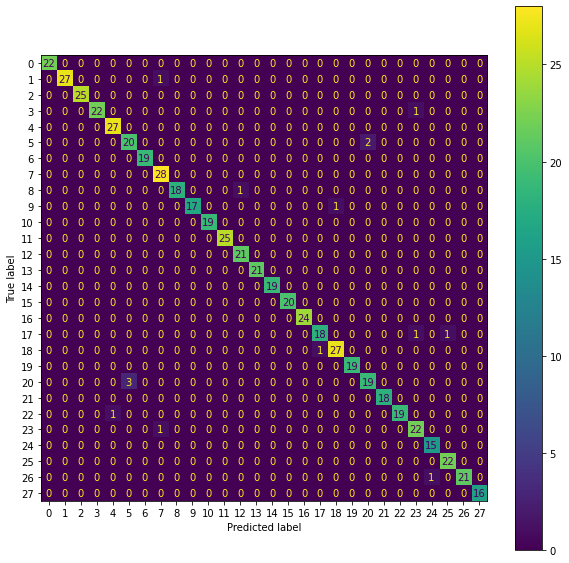

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        25
           3       1.00      0.96      0.98        23
           4       0.96      1.00      0.98        27
           5       0.87      0.91      0.89        22
           6       1.00      1.00      1.00        19
           7       0.93      1.00      0.97        28
           8       1.00      0.95      0.97        19
           9       1.00      0.94      0.97        18
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        25
          12       0.95      1.00      0.98        21
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       0.95    

In [67]:
ModelAssemesment(y_test_doc2vex,y_pred_doc2vex_Knn)

In [69]:
print_avg_bias_variance_loss(Knn_clf_d,np.array(X_train_doc2vex),y_train_doc2vex.values,np.array(X_test_doc2vex),y_test_doc2vex.values)

Average expected loss: 0.028
Avg Bias: 0.021
Avg Variance: 0.018


In [70]:
get_misclassified_languages(y_test_doc2vex,y_pred_doc2vex_Knn, "KNN with Doc2Vec")

Languages with the highest missclasfied number of labels using KNN with Doc2Vec


,Recall,Label,Lang
20,0.863636,20,Norwegian
17,0.900000,17,Japanese
5,0.909091,5,Danish
9,0.944444,9,French
8,0.947368,8,Finnish
22,0.950000,22,Portuguese
26,0.954545,26,Tagalog
3,0.956522,3,Chinese
23,0.956522,23,Russian
1,0.964286,1,Bulgarian


#### Apply RF for Doc2Vec

In [71]:
RF_clf_d = RandomForestClassifier()
RF_clf_d.fit(X_train_doc2vex, y_train_doc2vex)
y_pred_doc2vec_RF = RF_clf_d.predict(X_test_doc2vex)

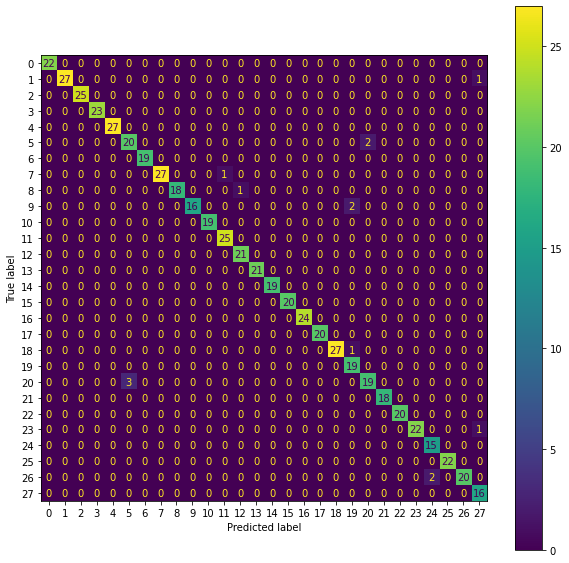

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        27
           5       0.87      0.91      0.89        22
           6       1.00      1.00      1.00        19
           7       1.00      0.96      0.98        28
           8       1.00      0.95      0.97        19
           9       1.00      0.89      0.94        18
          10       1.00      1.00      1.00        19
          11       0.96      1.00      0.98        25
          12       0.95      1.00      0.98        21
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        24
          17       1.00    

In [72]:
ModelAssemesment(y_test_doc2vex,y_pred_doc2vec_RF)

In [73]:
print_avg_bias_variance_loss(RF_clf_d,np.array(X_train_doc2vex),y_train_doc2vex.values,np.array(X_test_doc2vex),y_test_doc2vex.values)

Average expected loss: 0.027
Avg Bias: 0.021
Avg Variance: 0.017


Average expected loss: 0.028
Avg Bias: 0.038
Avg Variance: 0.04

In [74]:
get_misclassified_languages(y_test_doc2vex,y_pred_doc2vec_RF, "RF with Doc2Vec")

Languages with the highest missclasfied number of labels using RF with Doc2Vec


,Recall,Label,Lang
20,0.863636,20,Norwegian
9,0.888889,9,French
5,0.909091,5,Danish
26,0.909091,26,Tagalog
8,0.947368,8,Finnish
23,0.956522,23,Russian
1,0.964286,1,Bulgarian
7,0.964286,7,Esperanto
18,0.964286,18,Latin


## **Clustering** 

In [75]:
def get_kappa_score(true_labels: np.array,clusters_labels: np.array):
    num_Labels  = len(np.unique(true_labels))
    rev_true_label = true_labels[::-1]
    dic_true_new = {}
    for i in range(num_Labels):
        pos = np.where(true_labels == i)
        first_pos = pos[0][0]
        last_pos = pos[0][-1] +1
        temp_arr = clusters_labels[first_pos:last_pos]
        most_frequent = np.argmax(np.bincount(temp_arr))
        new_label = i + num_Labels + 1
        clusters_labels[clusters_labels == most_frequent] = new_label
        dic_true_new[i] = new_label
    for key in dic_true_new:
        clusters_labels[clusters_labels == dic_true_new[key]] = key
    return clusters_labels

    

### **WITH BOW**

#### Apply K-means for BOW

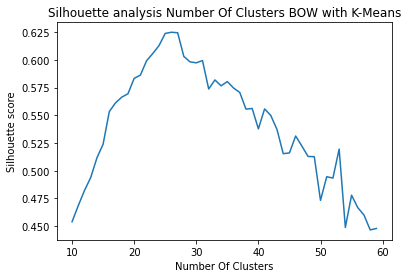

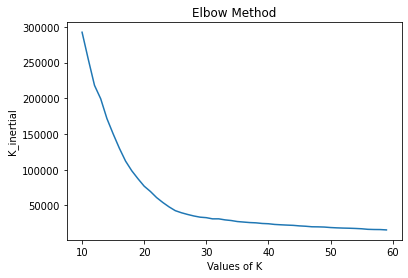

In [76]:
K_inertial = []
silhouette_avg = []
n1 = 10
n2 = 60
for i in range(n1, n2):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=30, n_init=10,random_state=0)
    kmeans.fit(tsne_X_bag_of_words)
    kmeans_pred_BOW = kmeans.predict(tsne_X_bag_of_words)
    K_inertial.append(kmeans.inertia_)
    # silhouette score
    silhouette_avg.append(silhouette_score(tsne_X_bag_of_words, kmeans_pred_BOW))
plt.plot(range(n1, n2),silhouette_avg)
plt.xlabel('Number Of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis Number Of Clusters BOW with K-Means')
plt.show()
plt.plot(range(n1, n2), K_inertial)
plt.title('Elbow Method')
plt.xlabel('Values of K')
plt.ylabel('K_inertial')
plt.show()

Evaluation k-mean for BOW

In [77]:
kmeans = KMeans(n_clusters=28, init='k-means++', max_iter=30, n_init=10,random_state=0)
kmeans.fit(tsne_X_bag_of_words)
kmeans_pred_BOW = kmeans.predict(tsne_X_bag_of_words)
# print(kmeans_pred_BOW)

print(f'silhouette_score :{silhouette_score(tsne_X_bag_of_words, kmeans_pred_BOW)}')
cluster_labels = get_kappa_score(new_df.Label.to_numpy(),kmeans_pred_BOW)
print(f'cohen_kappa_score: {cohen_kappa_score(new_df.Label.to_numpy(),cluster_labels)}')

silhouette_score :0.6031649708747864
cohen_kappa_score: 0.8439643347050755


In [78]:
get_misclassified_languages(new_df.Label.to_numpy(),cluster_labels, "k-means with BOW")

Languages with the highest missclasfied number of labels using k-means with BOW


,Recall,Label,Lang
23,0.388889,23,Russian
17,0.407407,17,Japanese
26,0.462963,26,Tagalog
5,0.592593,5,Danish
3,0.638889,3,Chinese
20,0.694444,20,Norwegian
18,0.694444,18,Latin
14,0.768519,14,Hungarian
13,0.805556,13,Hebrew
7,0.814815,7,Esperanto


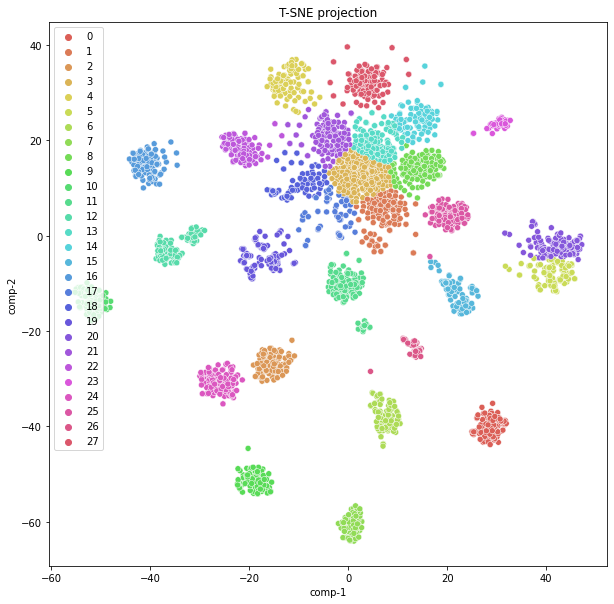

In [79]:
plot_tsne(tsne_X_bag_of_words,kmeans_pred_BOW)

#### Apply Hierarchical for BOW 

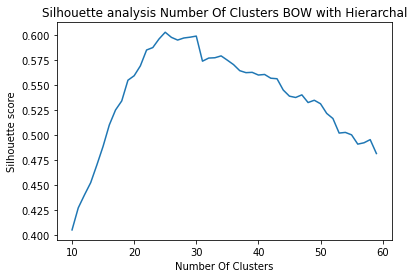

In [80]:
silhouette_avg = []

for i in range(n1, n2):

    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    Hirarical_BOW = cluster.fit_predict(tsne_X_bag_of_words)
    silhouette_avg.append(silhouette_score(tsne_X_bag_of_words, Hirarical_BOW) )

plt.plot(range(n1, n2),silhouette_avg)
plt.xlabel('Number Of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis Number Of Clusters BOW with Hierarchal')
plt.show()



Evaluation Hirarical for BOW

In [81]:
cluster = AgglomerativeClustering(n_clusters=28, affinity='euclidean', linkage='ward')  
Hirarical_BOW = cluster.fit_predict(tsne_X_bag_of_words)
# print(Hirarical_BOW)
print(f'silhouette_score :{silhouette_score(tsne_X_bag_of_words, Hirarical_BOW)}')
cluster_labels = get_kappa_score(new_df.Label.to_numpy(),Hirarical_BOW)
print(f'cohen_kappa_score: {cohen_kappa_score(new_df.Label.to_numpy(),cluster_labels)}')

silhouette_score :0.5973920822143555
cohen_kappa_score: 0.8268175582990398


In [82]:
get_misclassified_languages(new_df.Label.to_numpy(),cluster_labels, "KNN with Doc2Vec")

Languages with the highest missclasfied number of labels using KNN with Doc2Vec


,Recall,Label,Lang
5,0.000000,5,Danish
17,0.240741,17,Japanese
23,0.388889,23,Russian
26,0.462963,26,Tagalog
18,0.509259,18,Latin
3,0.583333,3,Chinese
7,0.814815,7,Esperanto
19,0.824074,19,Middle English
4,0.851852,4,Czech
14,0.944444,14,Hungarian


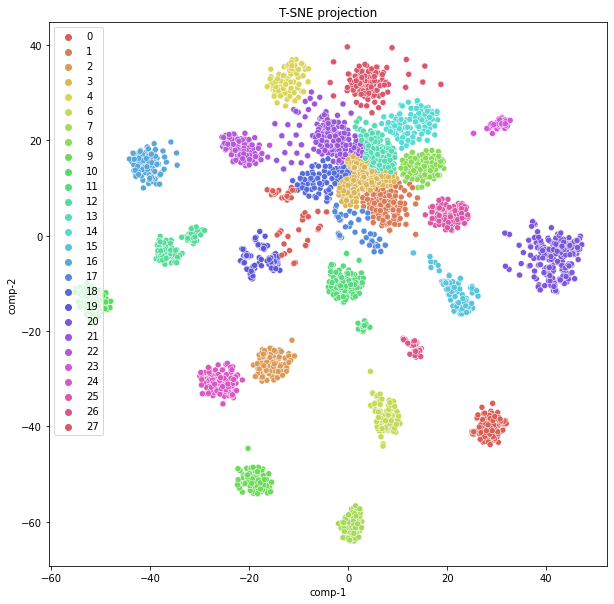

In [83]:
plot_tsne(tsne_X_bag_of_words,Hirarical_BOW)

###**WITH DOC2VEC**

#### Apply K-Means for Doc2Vec 

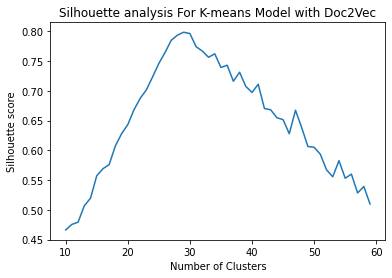

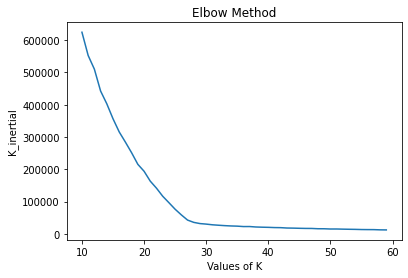

In [84]:
# Word Embedding with K-means
K_inertial = []
silhouette_avg = []
n1 = 10
n2 = 60
for i in range(n1, n2):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(tsne_X_vec)
    kmeans_pred_Doc2Vec = kmeans.predict(tsne_X_vec)
    K_inertial.append(kmeans.inertia_)
    # silhouette score
    silhouette_avg.append(silhouette_score(tsne_X_vec, kmeans_pred_Doc2Vec ))
plt.plot(range(n1, n2),silhouette_avg)
plt.ylabel('Silhouette score') 
plt.xlabel('Number of Clusters') 
plt.title('Silhouette analysis For K-means Model with Doc2Vec')
plt.show()
plt.plot(range(n1, n2), K_inertial)
plt.title('Elbow Method')
plt.xlabel('Values of K') 
plt.ylabel('K_inertial')
plt.show()

Evaluation K-means for Doc2Vec

In [85]:
kmeans = KMeans(n_clusters=29, init='k-means++', random_state=0)
kmeans.fit(tsne_X_vec)
kmeans_pred_Doc2Vec = kmeans.predict(tsne_X_vec)  
# print(kmeans_pred_Doc2Vec)
print(f'silhouette_score :{silhouette_score(tsne_X_vec, kmeans_pred_Doc2Vec)}')
cluster_labels_k_d = get_kappa_score(new_df.Label.to_numpy(),kmeans_pred_Doc2Vec)
print(f'cohen_kappa_score: {cohen_kappa_score(new_df.Label.to_numpy(),cluster_labels_k_d)}')

silhouette_score :0.7986916899681091
cohen_kappa_score: 0.9125953310727271


In [95]:
# get_misclassified_languages(new_df.Label.to_numpy(),cluster_labels_k_d, "k-means with Doc2Vec")

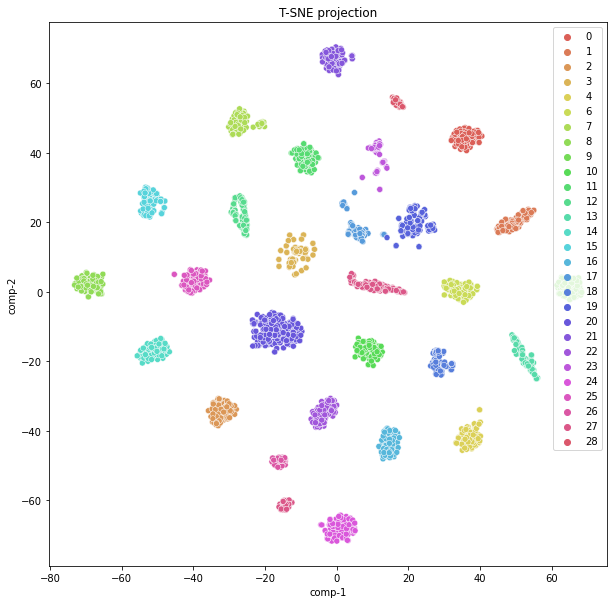

In [89]:
plot_tsne(tsne_X_vec,kmeans_pred_Doc2Vec)

#### Apply Hierarchal for Doc2Vec 

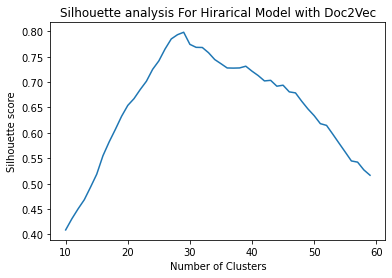

In [90]:
# Word Embedding with Hirarical Model

silhouette_avg = []
for i in range(n1, n2):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    Hirarical_Doc2Vec= cluster.fit_predict(tsne_X_vec)
    silhouette_avg.append(silhouette_score(tsne_X_vec, Hirarical_Doc2Vec ) )
plt.plot(range(n1, n2),silhouette_avg)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Hirarical Model with Doc2Vec')
plt.show()

Evaluation Hirarical for Doc2Vec

In [91]:
cluster = AgglomerativeClustering(n_clusters=27, affinity='euclidean', linkage='ward')  
Hirarical_Doc2Vec_5= cluster.fit_predict(tsne_X_vec)
# print(Hirarical_Doc2Vec_5)
print(f'silhouette_score :{silhouette_score(tsne_X_vec, Hirarical_Doc2Vec_5)}')
cluster_labels = get_kappa_score(new_df.Label.to_numpy(),Hirarical_Doc2Vec_5)
print(f'cohen_kappa_score: {cohen_kappa_score(new_df.Label.to_numpy(),cluster_labels)}')

silhouette_score :0.7849482893943787
cohen_kappa_score: 0.9396433470507545


In [92]:
get_misclassified_languages(new_df.Label.to_numpy(),cluster_labels, " with Doc2Vec")

Languages with the highest missclasfied number of labels using  with Doc2Vec


,Recall,Label,Lang
5,0.000000,5,Danish
18,0.824074,18,Latin
17,0.861111,17,Japanese
26,0.861111,26,Tagalog
9,0.953704,9,French
25,0.981481,25,Swedish
3,0.981481,3,Chinese
4,0.981481,4,Czech
1,0.990741,1,Bulgarian
7,0.990741,7,Esperanto


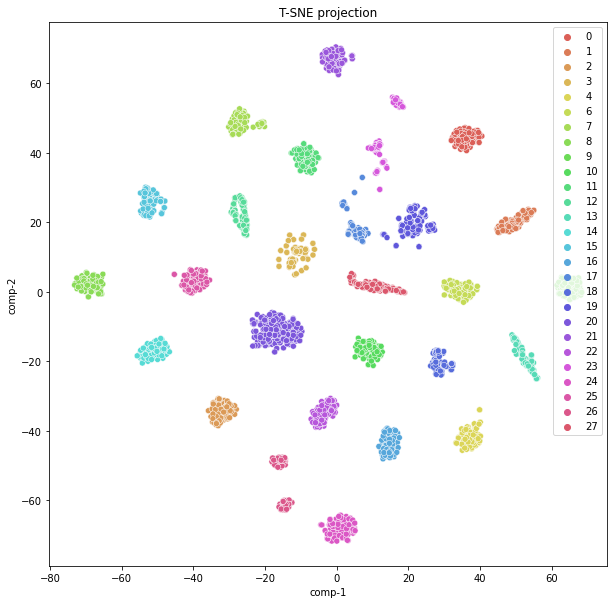

In [93]:
plot_tsne(tsne_X_vec,Hirarical_Doc2Vec_5)